# Our target:-

Data Understanding, Preparation, and EDA (25%):

Conduct data quality checks, address issues, and explain them in comments.

Handle categorical variables appropriately.

Create dummy variables properly.

Derive new metrics if applicable and use them for analysis.

Convert data to a clean format suitable for analysis.



Model Building and Evaluation (50%):

Tune model parameters using correct principles and explain the approach.

Consider both technical and business aspects while building the model.

Use correct variable selection techniques.

Attempt a reasonable number of different models and choose the best one based on key performance metrics.

Perform residual analysis after model building and validate assumptions.

Evaluate the model using appropriate principles and metrics.

Interpret and explain the model in simple terms, including important variables.



Coding Guidelines (5%):

Write appropriate comments where applicable.

Use descriptive and unambiguous names for new variables.

Write concise code with good readability and appropriate indentations.

Ensure the GitHub repository is public and contains a Python file, PDF file, and a README.md file.

The README.md file should provide a brief description of the project.

State any assumptions clearly.



Subjective Questions (20%):

Provide correct, concise, and to-the-point answers.

Include examples where necessary.

# Import necessary libraries

In [71]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Load the dataset

In [78]:
# Import data from CSV file
file_path = 'Data/day.csv'

try:
    dayData = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [3]:
dayData.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Data Understanding

In [4]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [5]:
import pandas as pd

def get_statistics_of_dayData(df):
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Specify numeric and categorical columns
    numeric_columns = ['numeric_column1', 'numeric_column2']  # Replace with your actual numeric column names
    categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

    # Iterate through each column in the input DataFrame
    for i, column in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = column

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[column].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[column].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[column].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[column].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if column in numeric_columns:
            summary_df.loc[i, 'Mean'] = df[column].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[column].describe()['std']
            summary_df.loc[i, 'Min'] = df[column].describe()['min']
            summary_df.loc[i, '25%'] = df[column].describe()['25%']
            summary_df.loc[i, '50%'] = df[column].describe()['50%']
            summary_df.loc[i, '75%'] = df[column].describe()['75%']
            summary_df.loc[i, 'Max'] = df[column].describe()['max']
            summary_df.loc[i, 'Unique Values of numbers'] = df[column].nunique()

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif column in categorical_columns:
            summary_df.loc[i, 'Unique Values'] = df[column].nunique()
            summary_df.loc[i, 'Top Value'] = df[column].mode().iloc[0]  # Use mode() instead of describe()
            summary_df.loc[i, 'Frequency'] = df[column].value_counts().max()
            summary_df.loc[i, 'Categorical'] = True

    return summary_df


In [6]:
dayDataWithStatistics = get_statistics_of_dayData(dayData)
dayDataWithStatistics

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Unique Values,Top Value,Frequency,Categorical
0,instant,int64,0.0,0.0,730.0,NaN,NaN,NaN,NaN
1,dteday,object,0.0,0.0,730.0,NaN,NaN,NaN,NaN
2,season,int64,0.0,726.0,730.0,4.0,3.0,188.0,True
3,yr,int64,0.0,728.0,730.0,2.0,0.0,365.0,True
4,mnth,int64,0.0,718.0,730.0,12.0,1.0,62.0,True
5,holiday,int64,0.0,728.0,730.0,2.0,0.0,709.0,True
6,weekday,int64,0.0,723.0,730.0,7.0,0.0,105.0,True
7,workingday,int64,0.0,728.0,730.0,2.0,1.0,499.0,True
8,weathersit,int64,0.0,727.0,730.0,3.0,1.0,463.0,True
9,temp,float64,0.0,232.0,730.0,NaN,NaN,NaN,NaN


In [7]:
def assess_columns(dayData, columns):
    """Perform visual, programmatic assessments, and display detailed statistics for specified columns."""
    for col in columns:
        print(f"\n{'='*50}\n{'Assessment Summary for'} '{col}'\n{'='*50}")
        
        # Visual assessment
        print(f"Visual Assessment of '{col}'".center(50, '-'))
        print(f"Head:\n{dayData[col].head()}\n")
        print(f"Tail:\n{dayData[col].tail()}\n")
        print(f"Sample:\n{dayData[col].sample(5)}\n")

        # Programmatic assessment
        datatype = dayData[col].dtype
        null_count = dayData[col].isnull().sum()
        null_percentage = (null_count / len(dayData) * 100)
        duplicate_count = dayData[col].duplicated().sum()

        print(f"Programmatic Assessment of '{col}'".center(50, '-'))
        print(f"Data Type: {datatype}")
        print(f"Null Count: {null_count}")
        print(f"Null Percentage: {null_percentage:.2f}%")
        print(f"Duplicate Count: {duplicate_count}\n")

        # Counts of unique values
        unique_values = dayData[col].value_counts()
        print(f"Counts of Unique Values for '{col}':\n{unique_values}\n")

        # Descriptive Statistics
        descriptive_stats = dayData[col].describe().to_frame().transpose()
        print(f"Descriptive Statistics for '{col}':\n{descriptive_stats}\n")

In [8]:
assess_columns(dayData, numeric_columns)


Assessment Summary for 'temp'
-----------Visual Assessment of 'temp'------------
Head:
0    14.110847
1    14.902598
2     8.050924
3     8.200000
4     9.305237
Name: temp, dtype: float64

Tail:
725    10.420847
726    10.386653
727    10.386653
728    10.489153
729     8.849153
Name: temp, dtype: float64

Sample:
485    25.146653
321    11.240847
314    13.290847
420    11.924153
280    21.388347
Name: temp, dtype: float64

--------Programmatic Assessment of 'temp'---------
Data Type: float64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 232

Counts of Unique Values for 'temp':
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64

Descriptive Statistics for 'temp':
      count       mean       std       min        25%        50%        75%  \
temp  730.0  20.319259  7.506729  2.424346  13.811885  20.465826  26.880615   



In [9]:
assess_columns(dayData, categorical_columns)


Assessment Summary for 'season'
----------Visual Assessment of 'season'-----------
Head:
0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

Tail:
725    1
726    1
727    1
728    1
729    1
Name: season, dtype: int64

Sample:
247    3
41     1
602    3
411    1
541    3
Name: season, dtype: int64

-------Programmatic Assessment of 'season'--------
Data Type: int64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 726

Counts of Unique Values for 'season':
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Descriptive Statistics for 'season':
        count     mean       std  min  25%  50%  75%  max
season  730.0  2.49863  1.110184  1.0  2.0  3.0  3.0  4.0


Assessment Summary for 'yr'
------------Visual Assessment of 'yr'-------------
Head:
0    0
1    0
2    0
3    0
4    0
Name: yr, dtype: int64

Tail:
725    1
726    1
727    1
728    1
729    1
Name: yr, dtype: int64

Sample:
61     0
42     0
575    1
215    0
629    1
Name: yr, dtype: int64

-

Since there are no duplicate rows and missing values, it seems the data is clean in these aspects.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

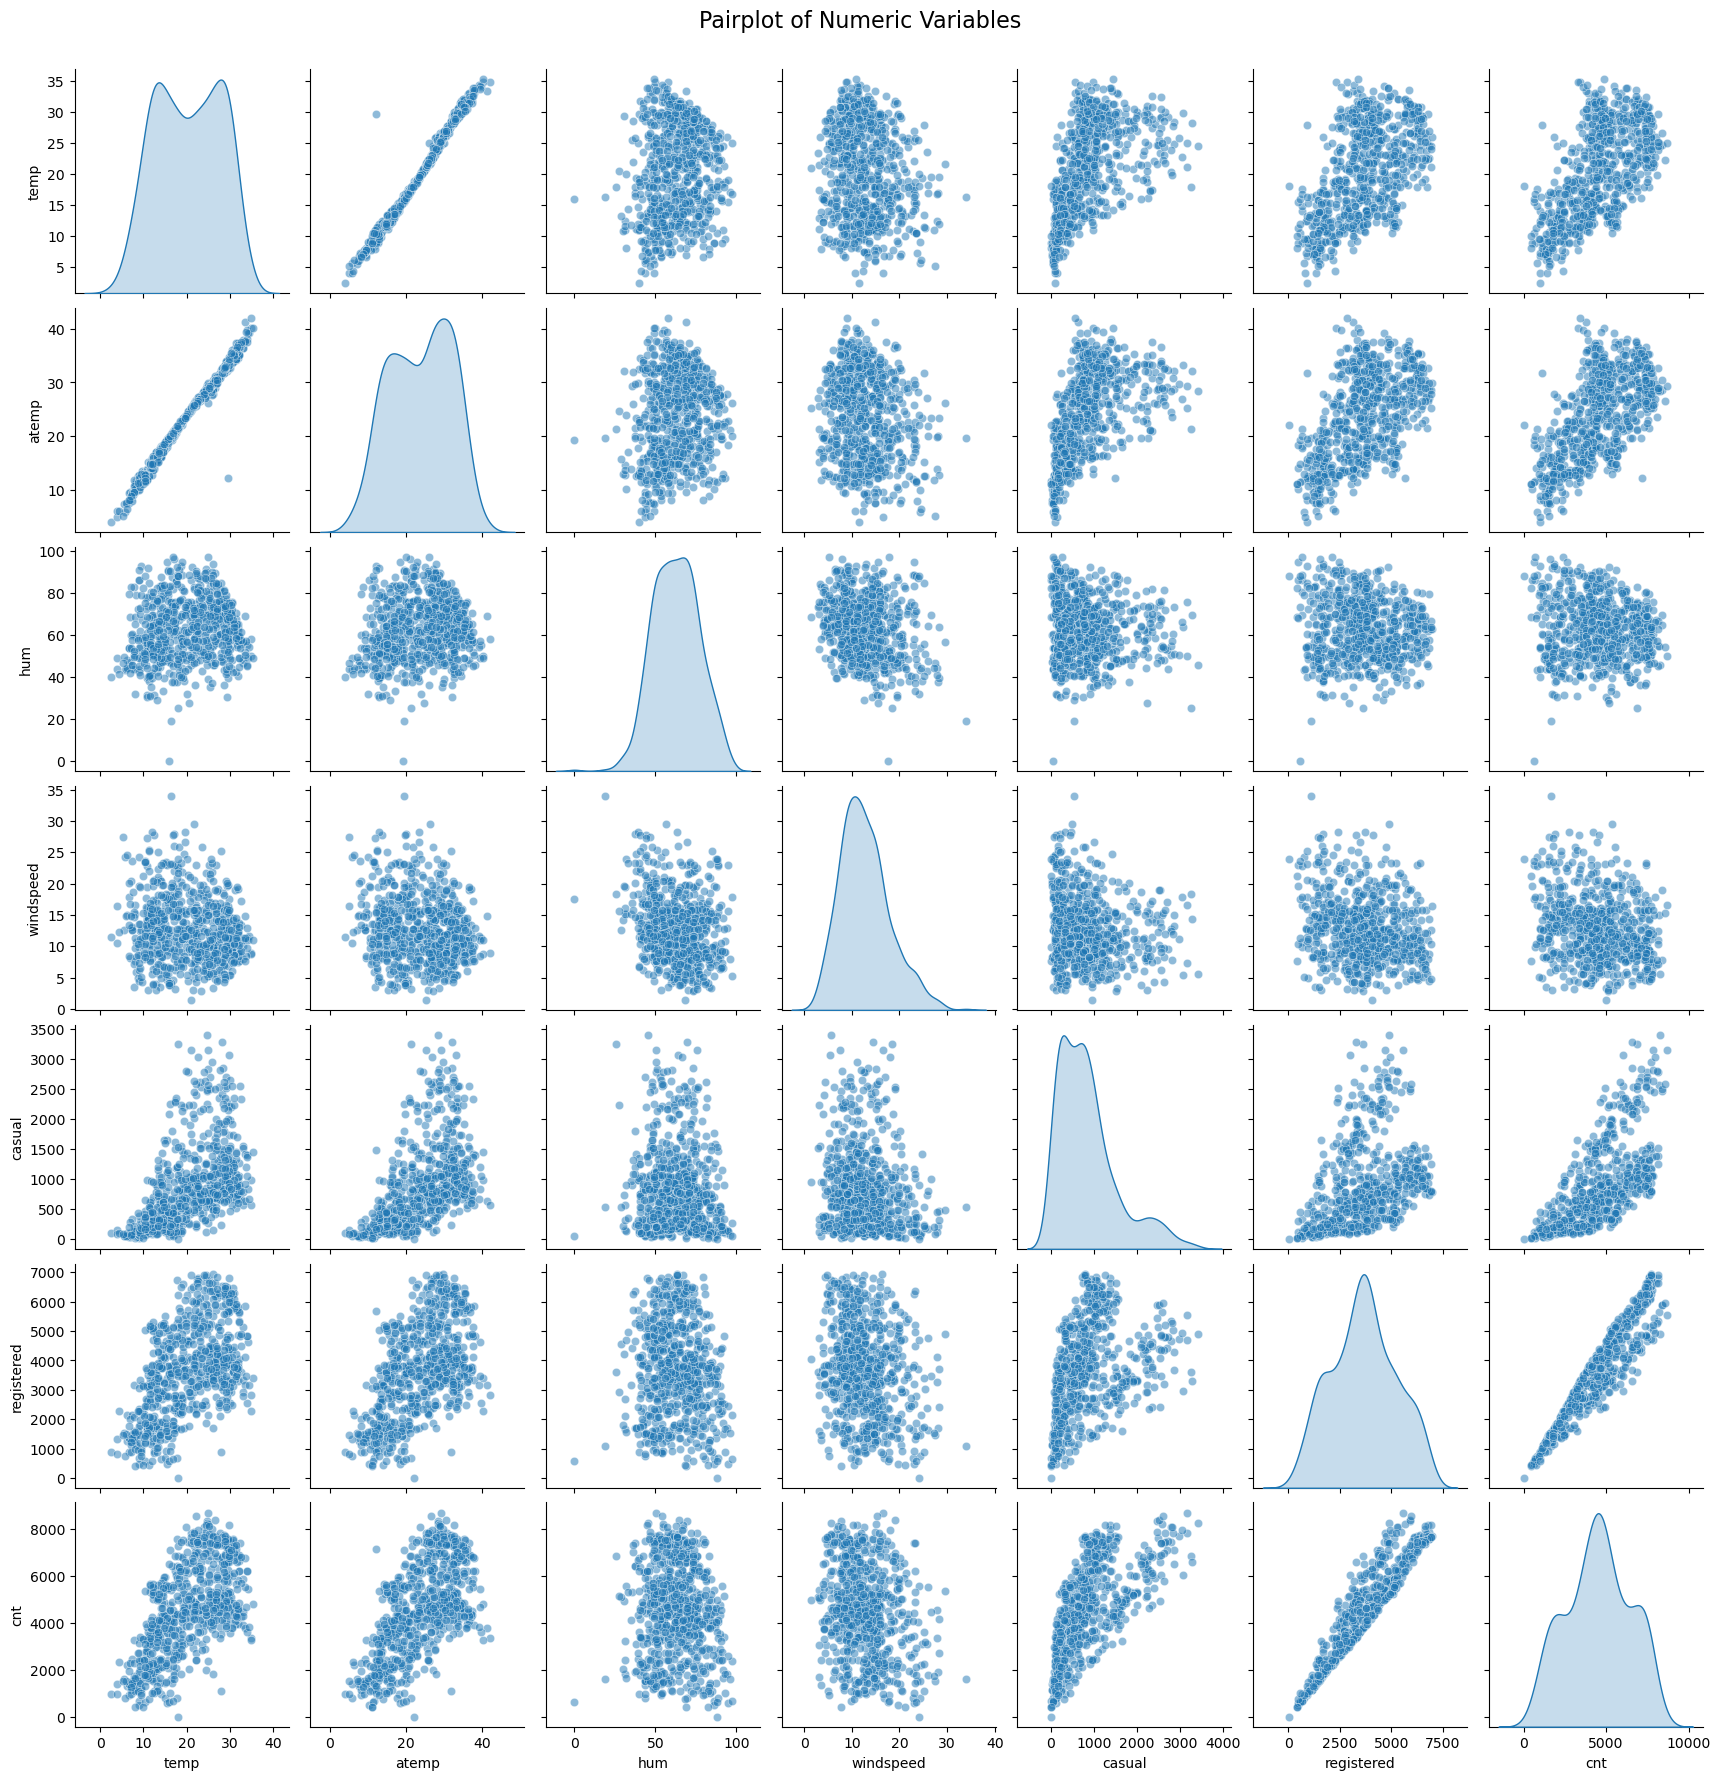

In [10]:
# Selecting only numeric columns for the pairplot

numeric_data = dayData[numeric_columns]

# Set a custom color palette for better aesthetics
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Visualize Numeric Variables using Pairplot with increased data points
sns.pairplot(numeric_data, height=2.5, palette=custom_palette, markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numeric Variables', y=1.02, size=16)
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

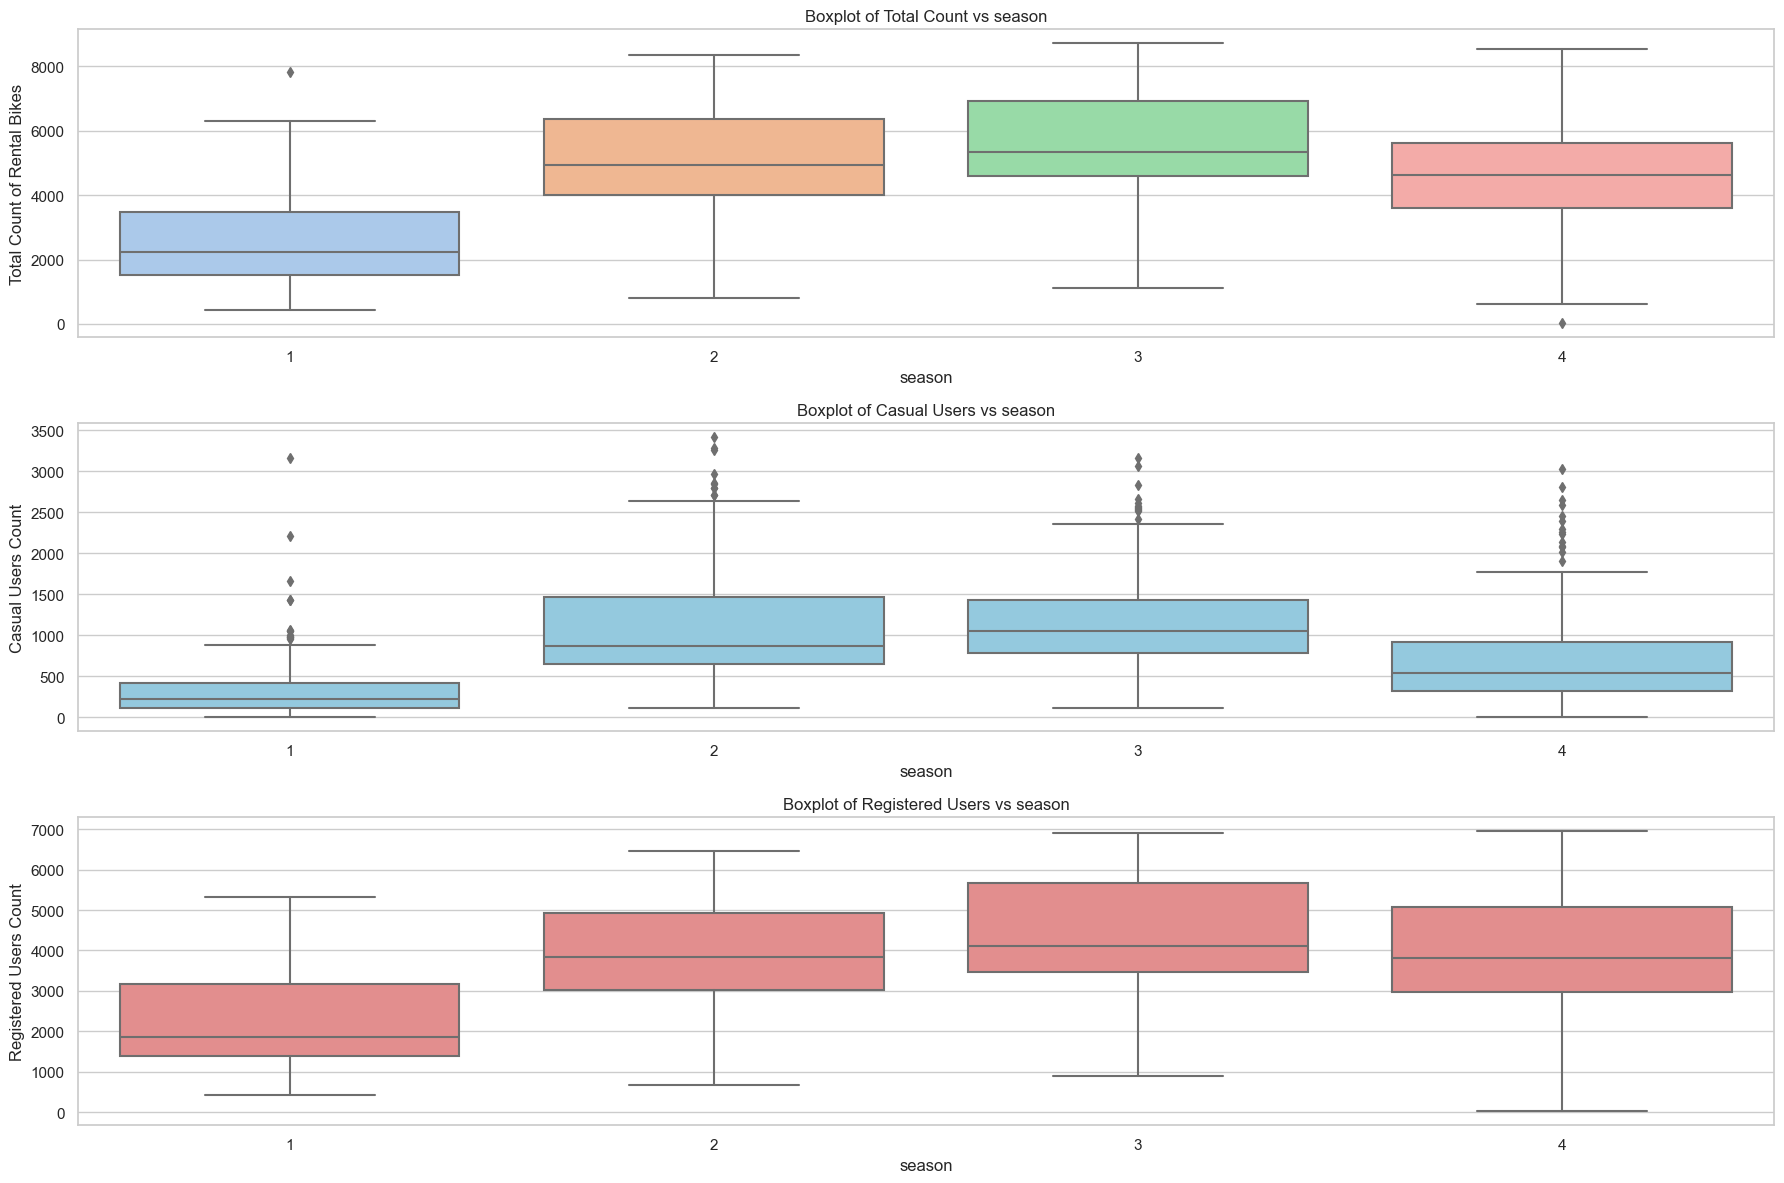

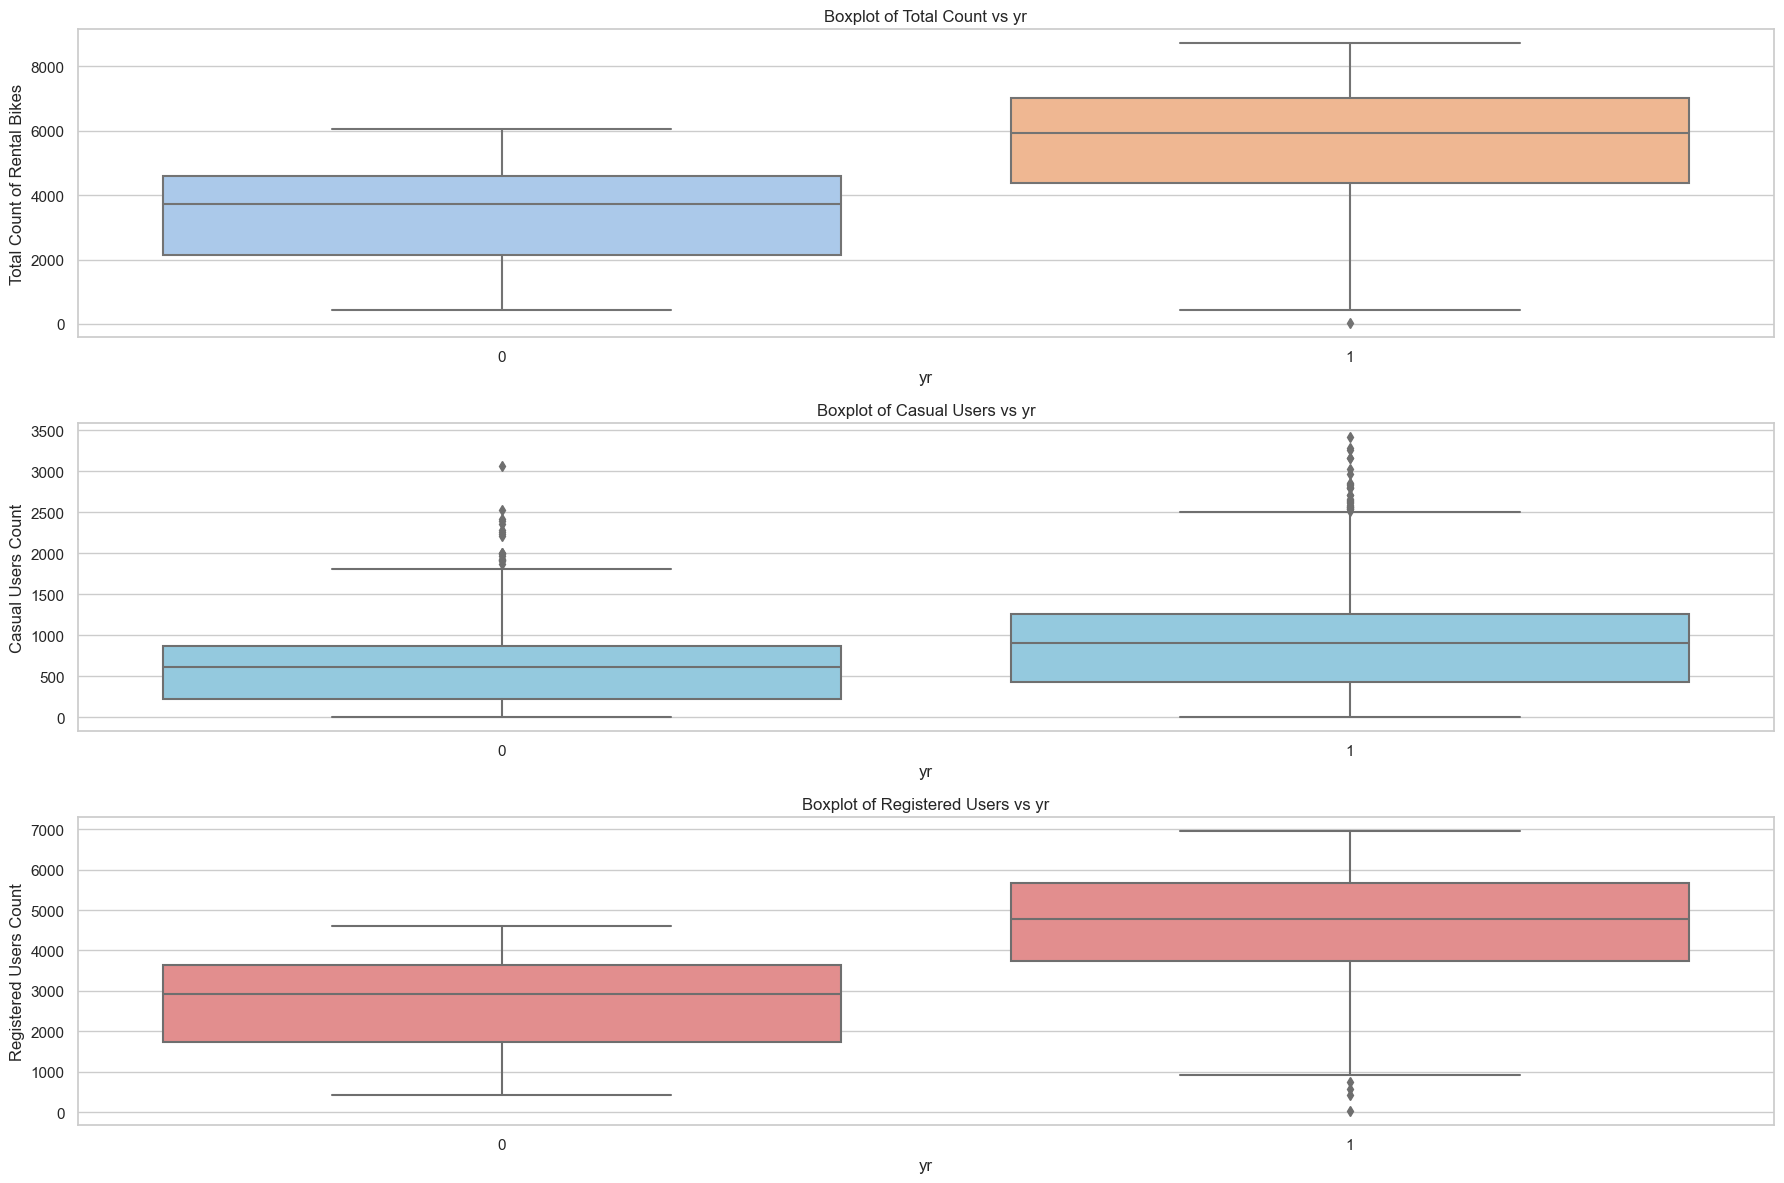

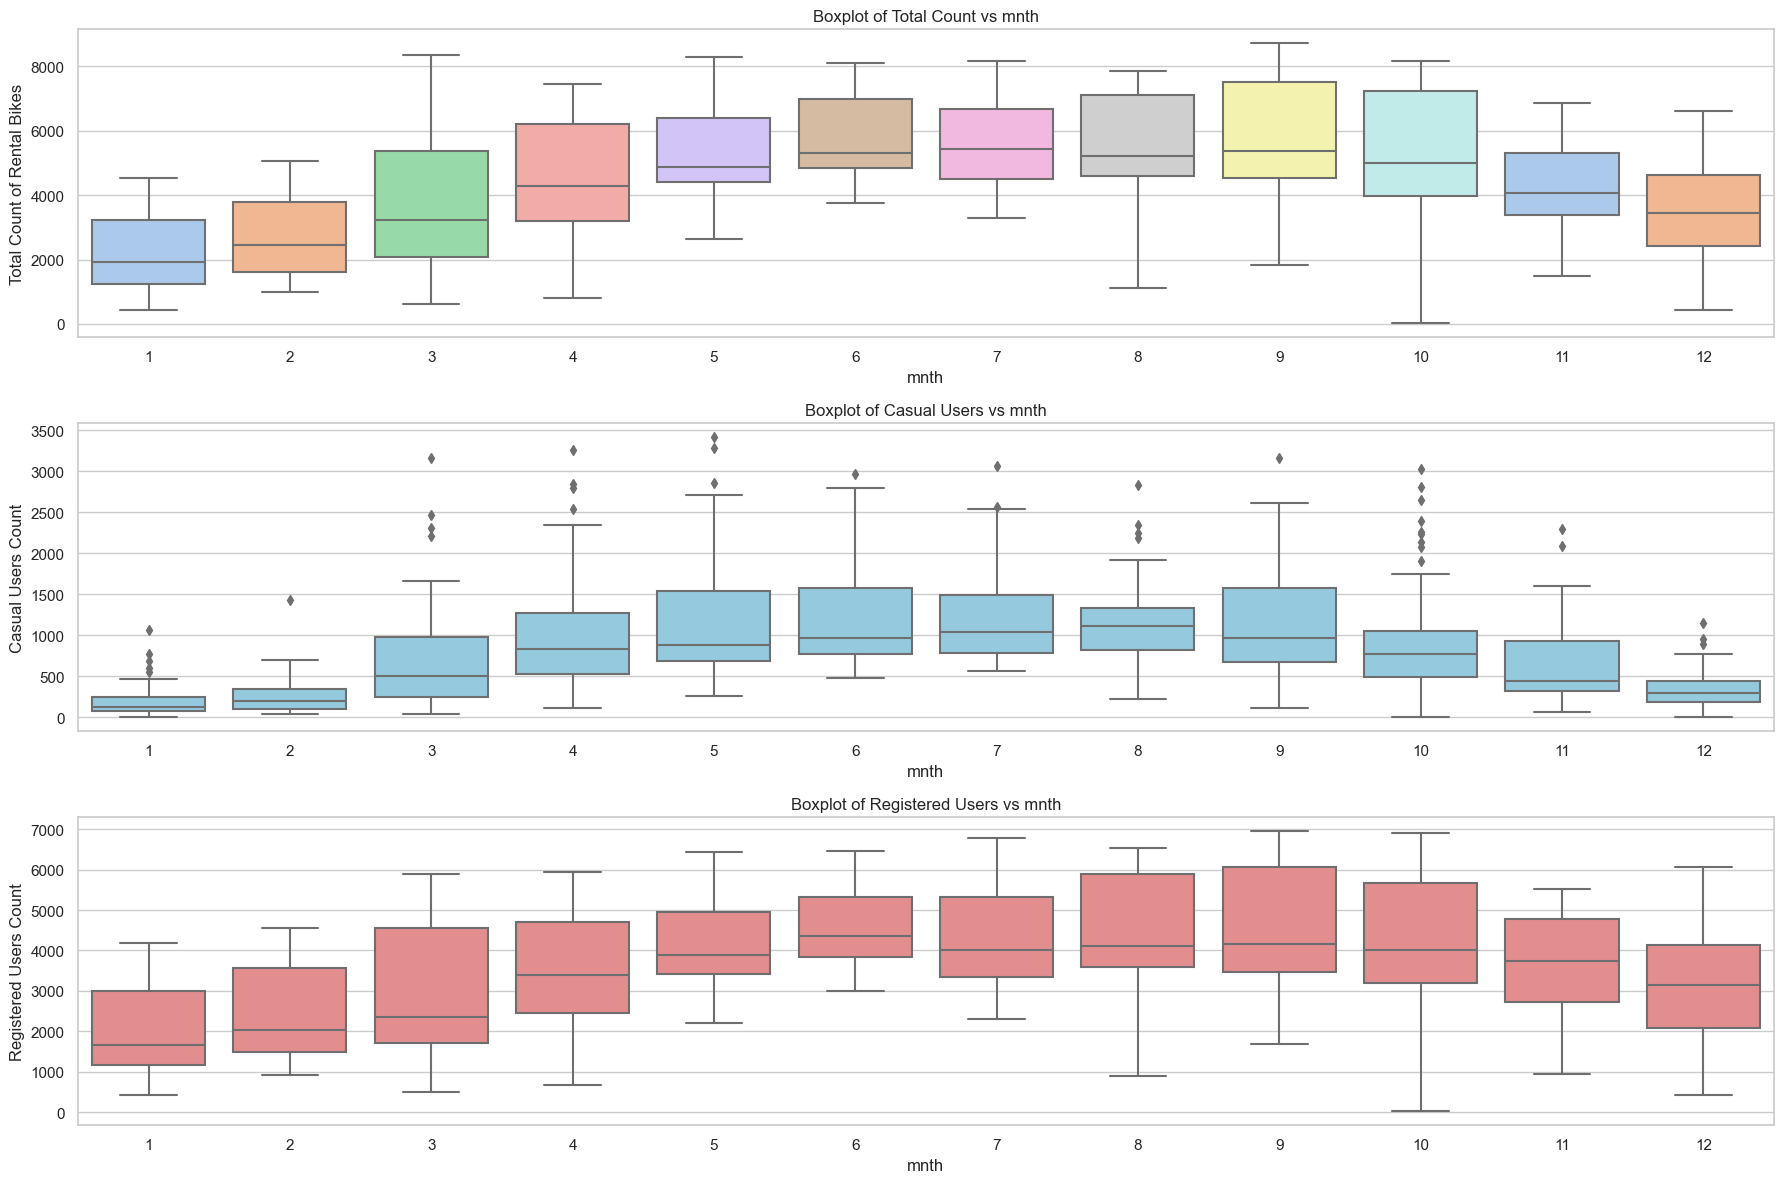

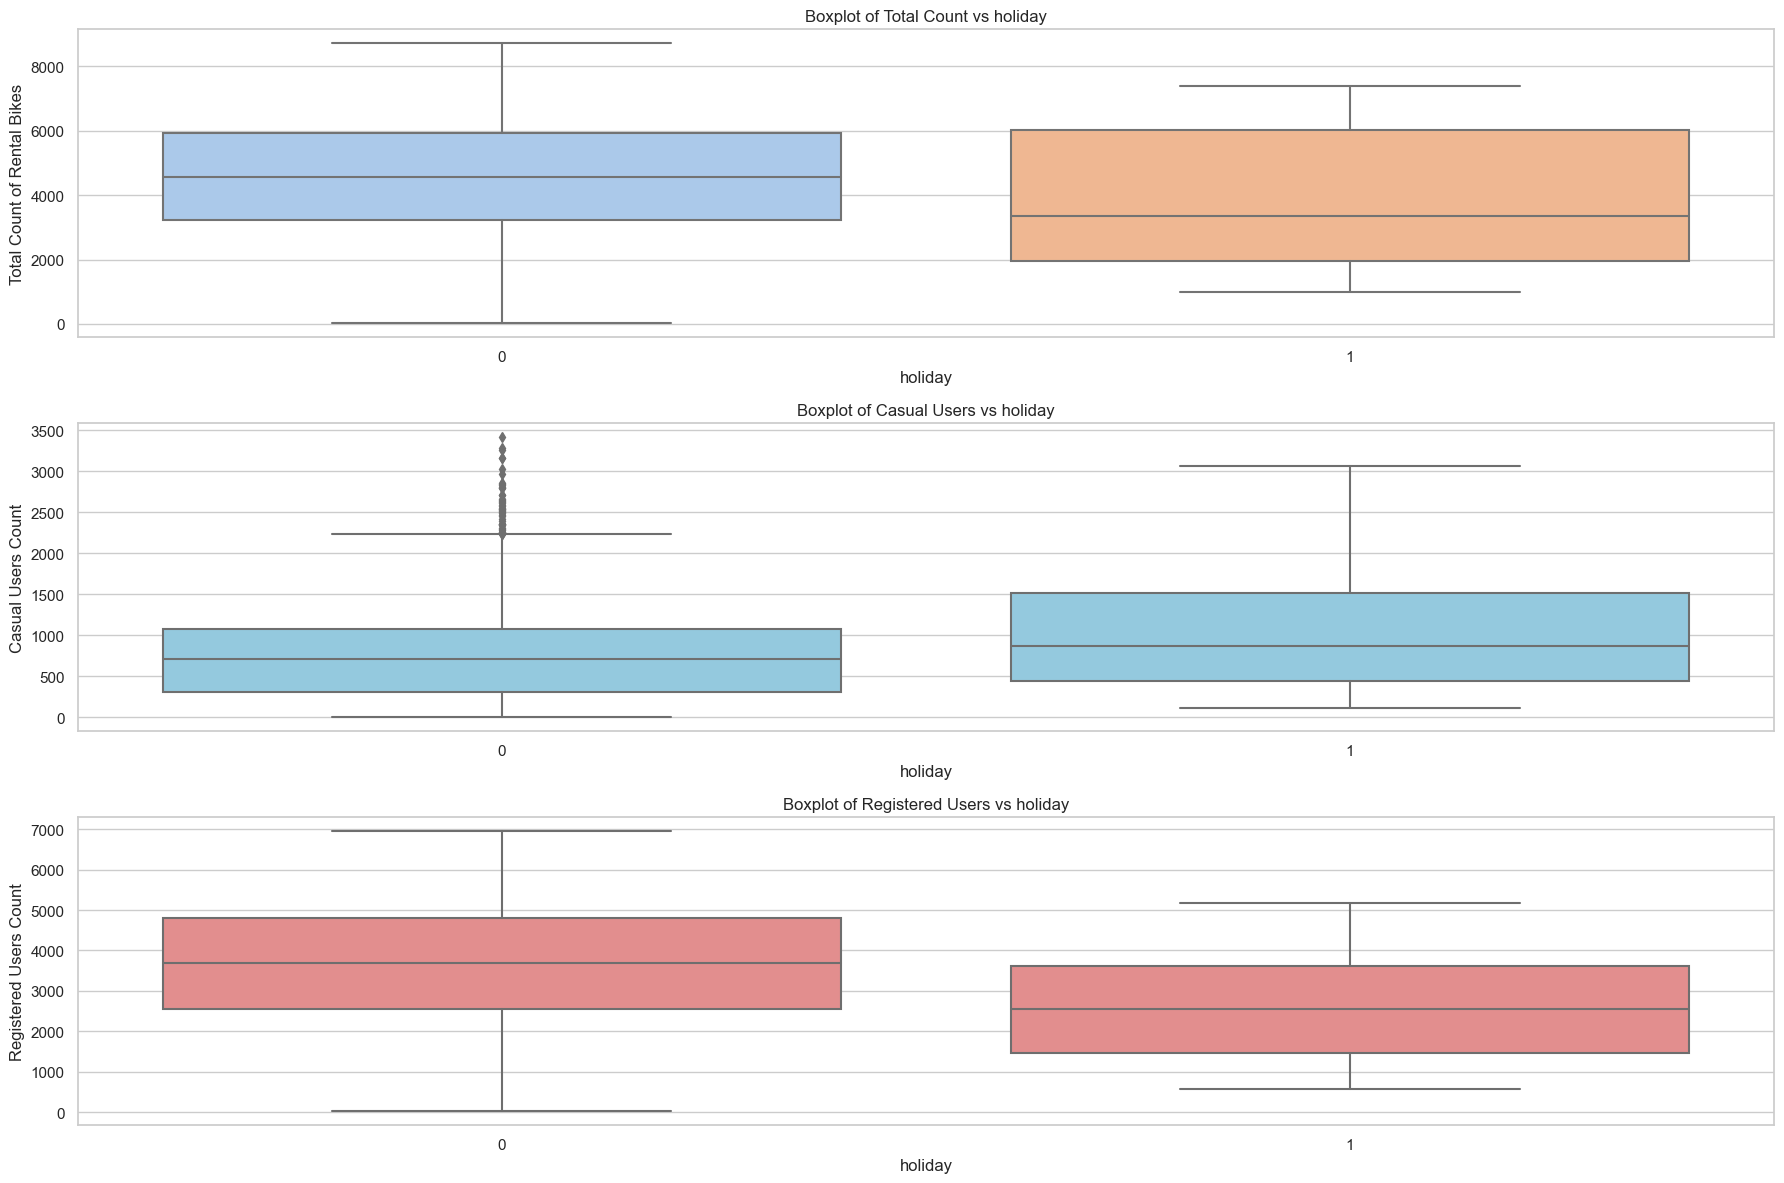

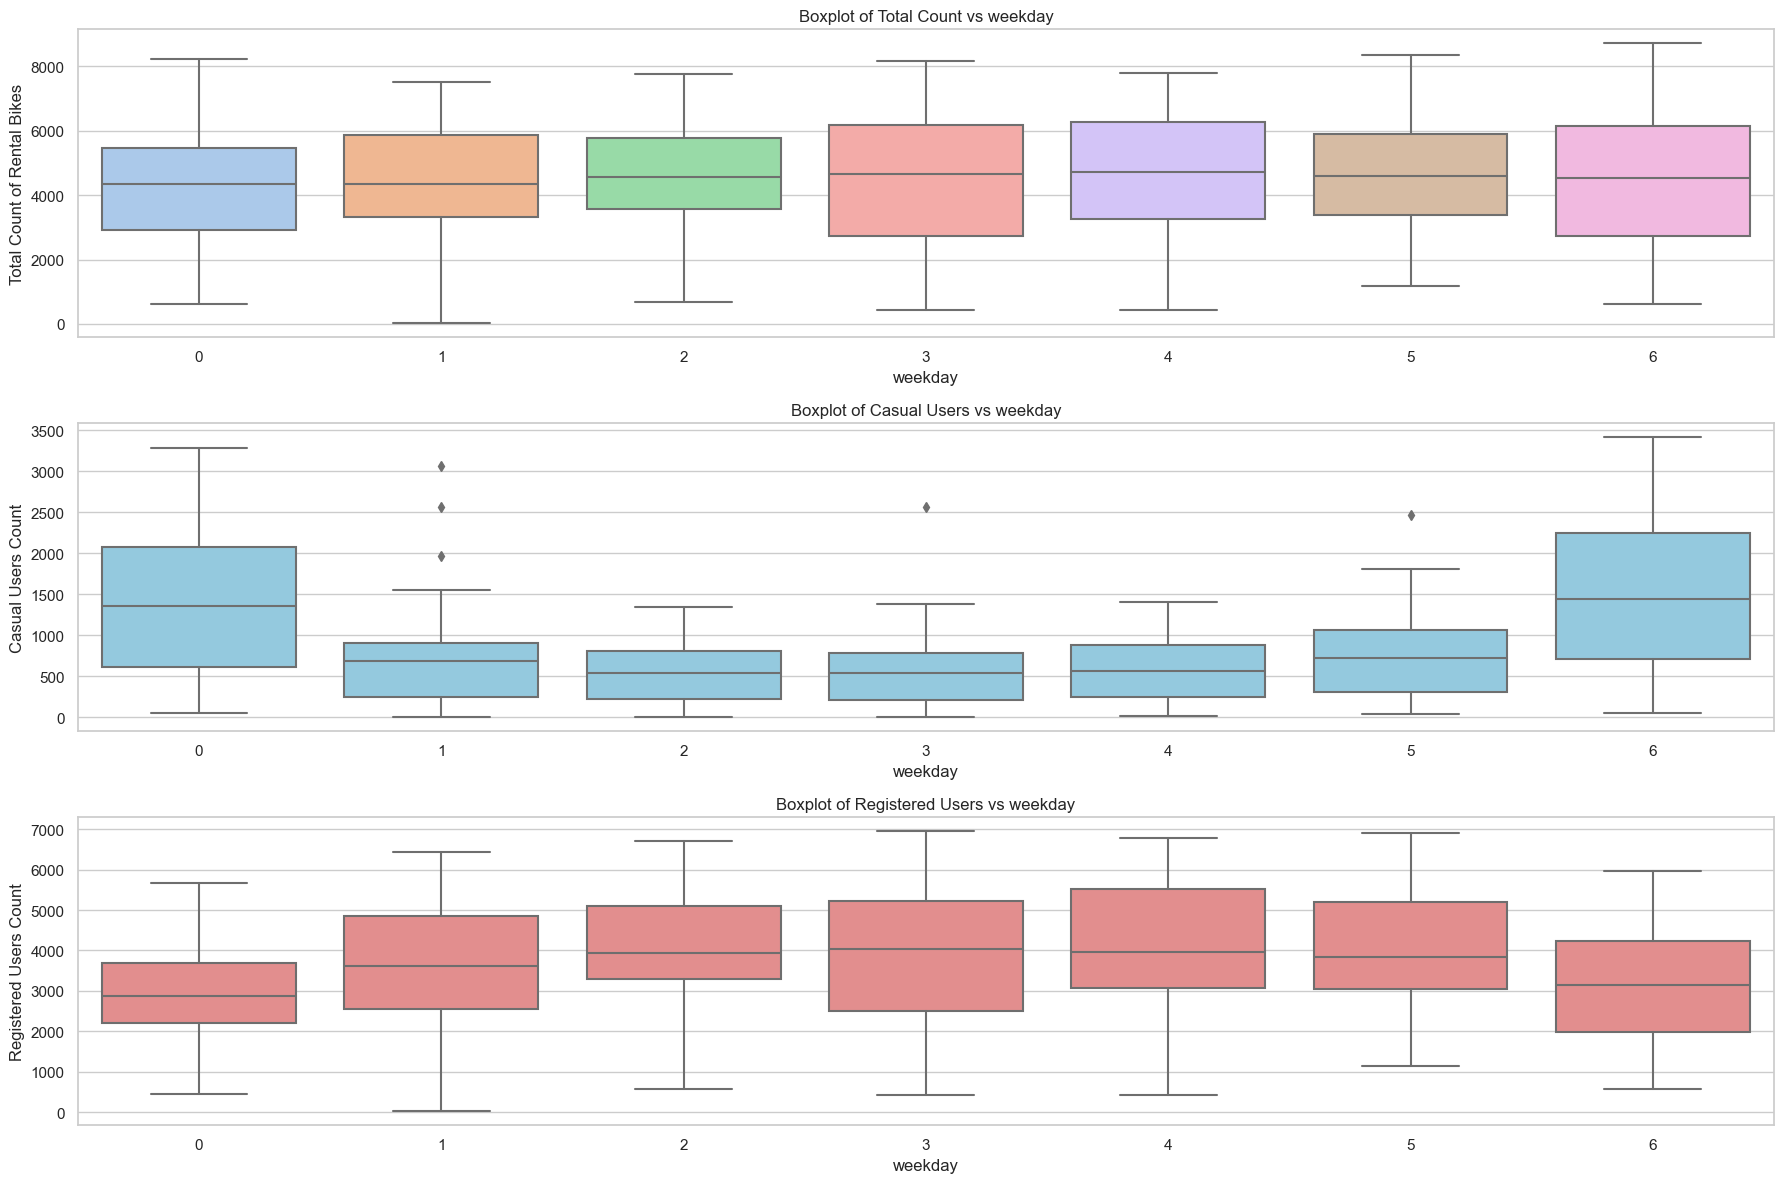

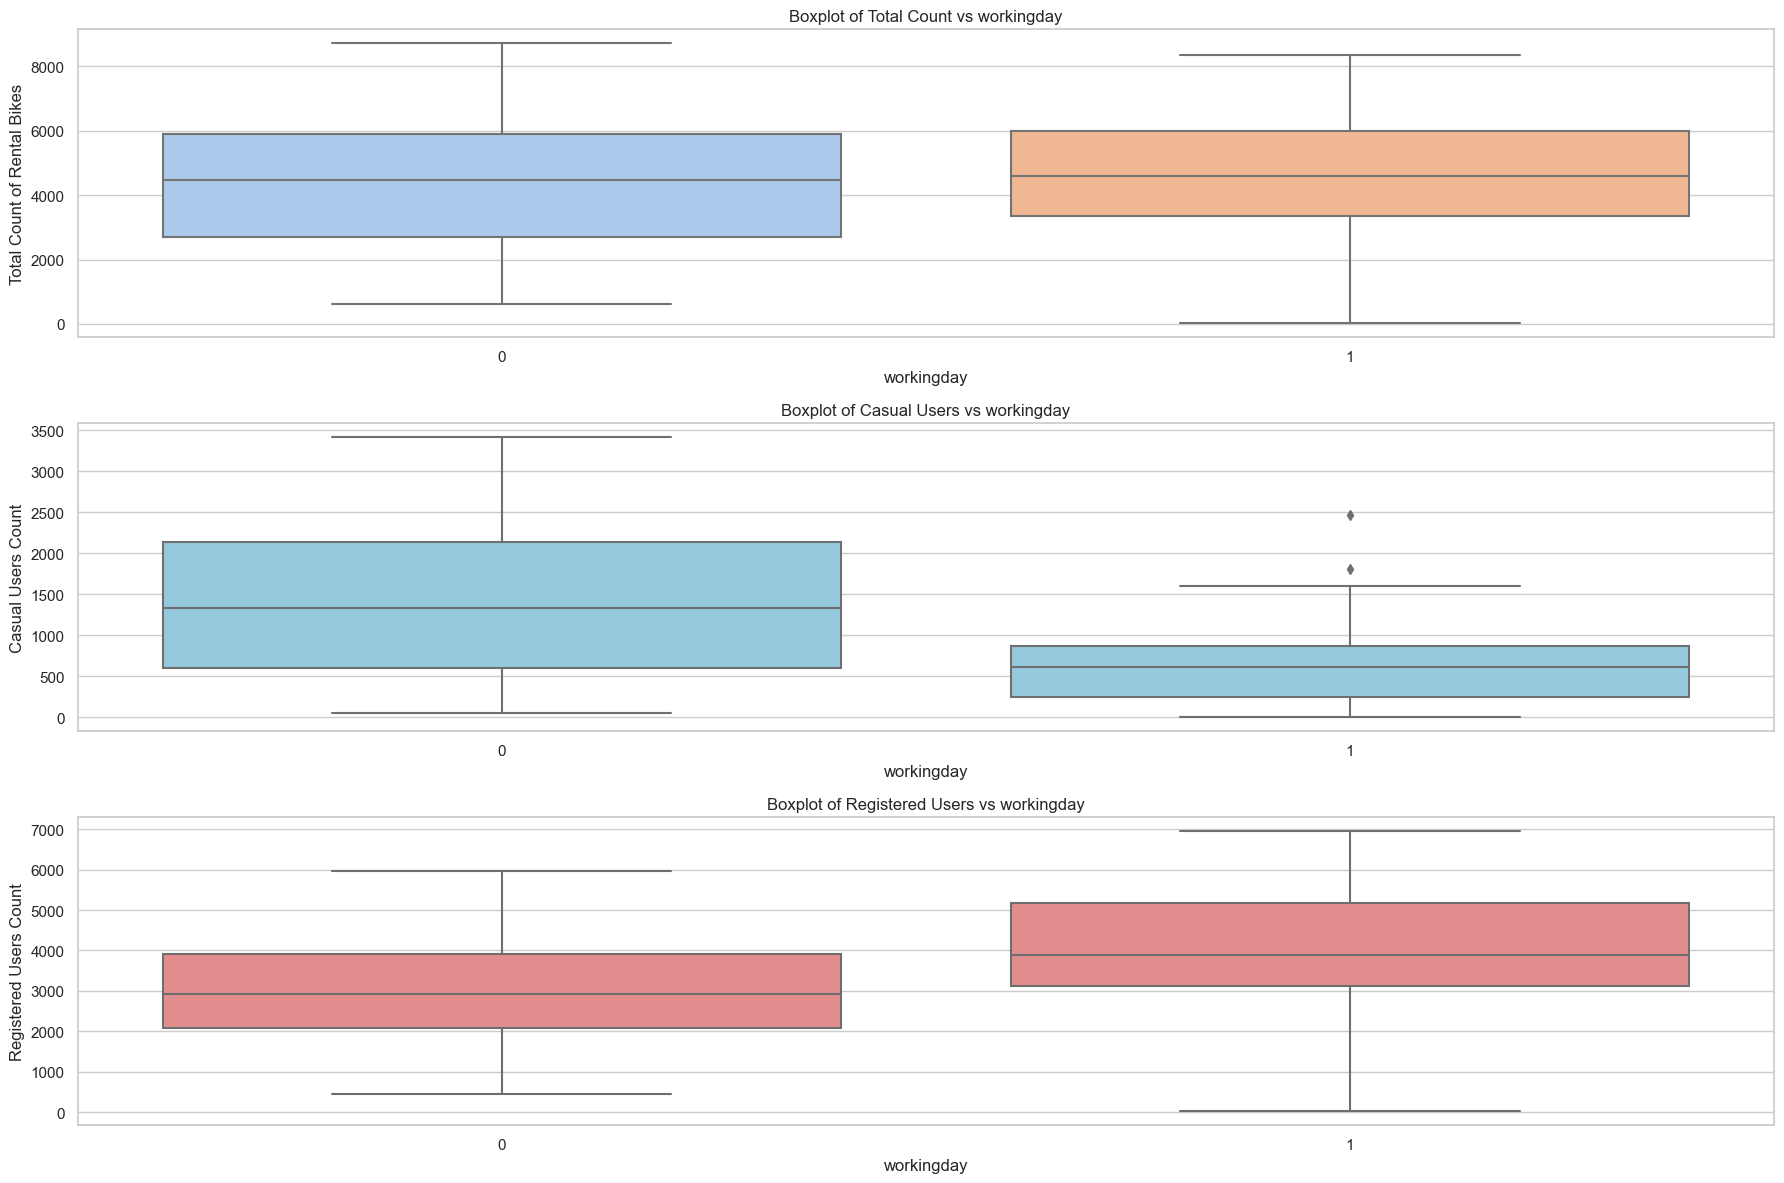

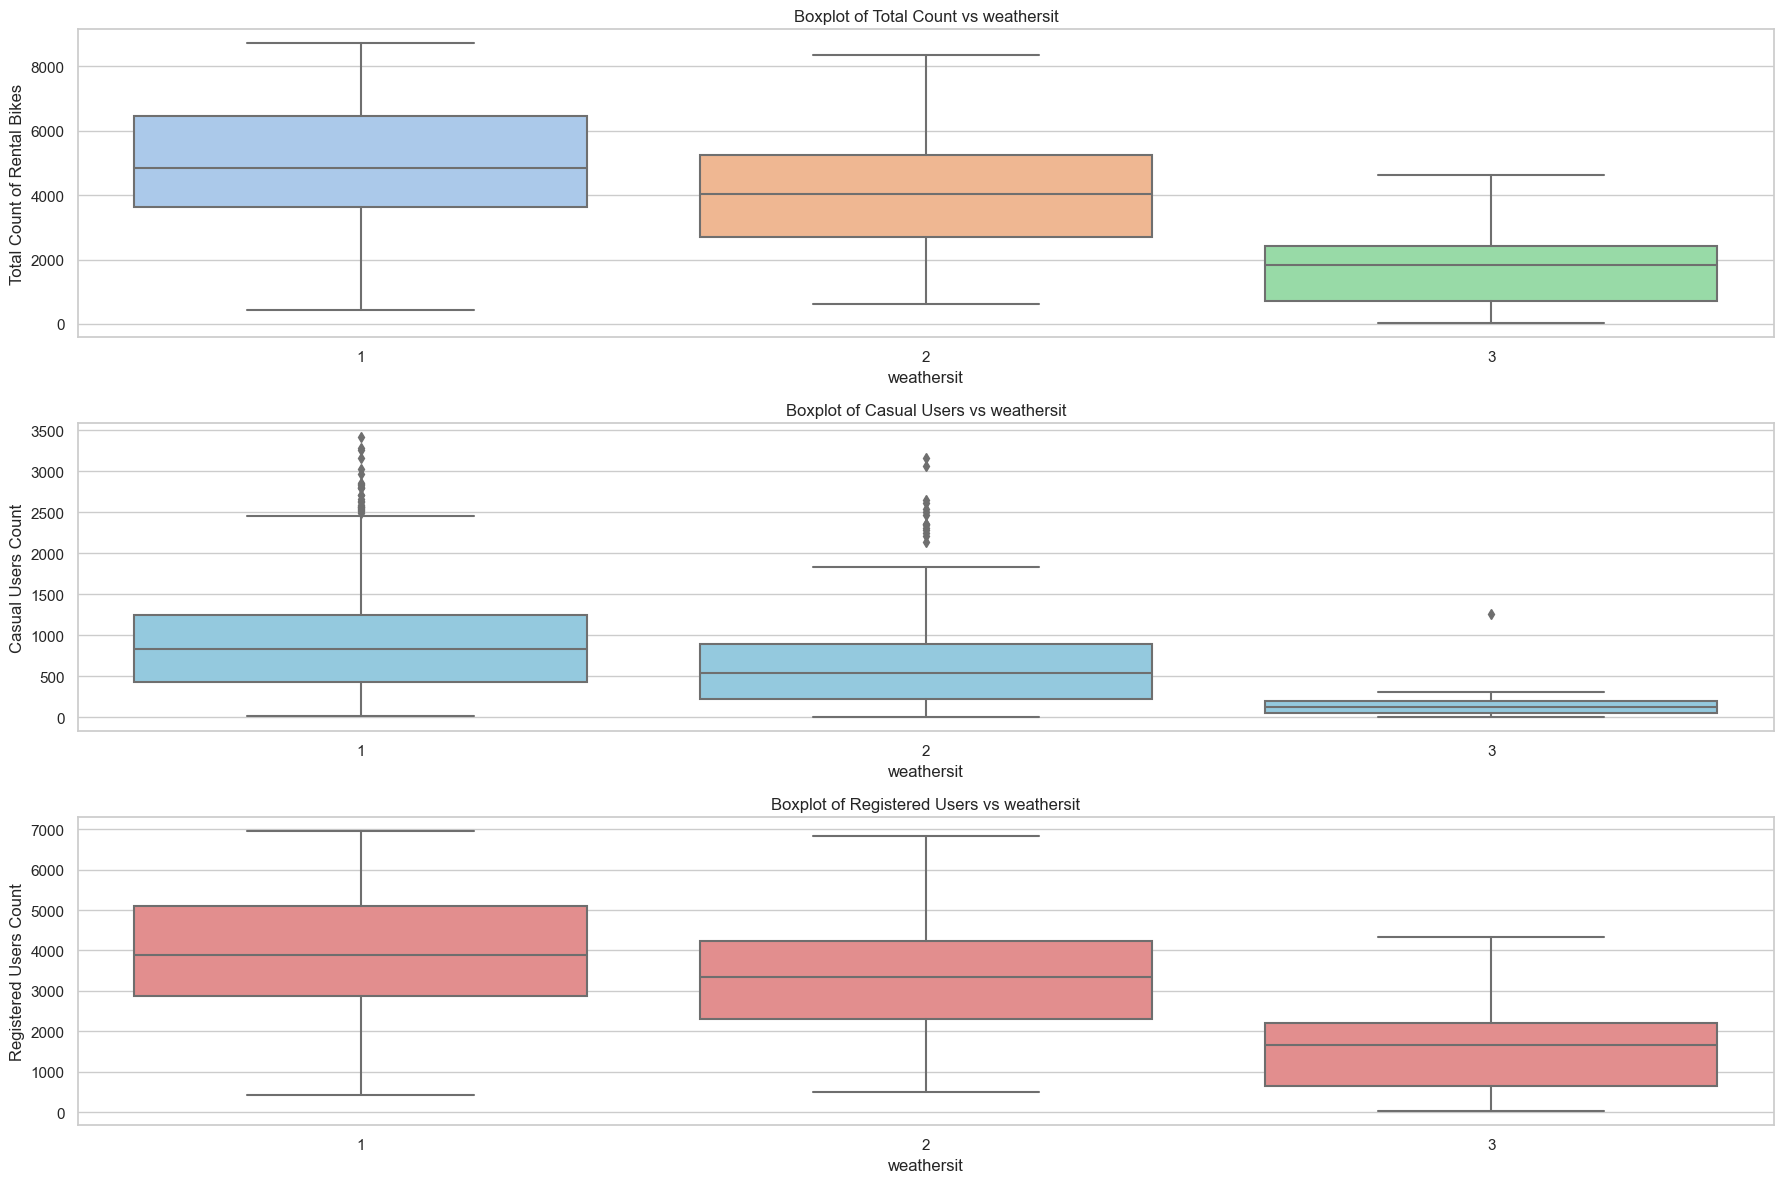

In [11]:
# Boxplots for categorical variables


for column in categorical_columns:
    plt.figure(figsize=(18, 12))
    sns.set(style="whitegrid")
    
    # Boxplot for Total Count
    plt.subplot(3, 1, 1)
    sns.boxplot(x=column, y='cnt', data=dayData, palette='pastel')
    plt.title(f'Boxplot of Total Count vs {column}')
    plt.xlabel(column)
    plt.ylabel('Total Count of Rental Bikes')

    # Boxplot for Casual Users
    plt.subplot(3, 1, 2)
    sns.boxplot(x=column, y='casual', data=dayData, color='skyblue')
    plt.title(f'Boxplot of Casual Users vs {column}')
    plt.xlabel(column)
    plt.ylabel('Casual Users Count')

    # Boxplot for Registered Users
    plt.subplot(3, 1, 3)
    sns.boxplot(x=column, y='registered', data=dayData, color='lightcoral')
    plt.title(f'Boxplot of Registered Users vs {column}')
    plt.xlabel(column)
    plt.ylabel('Registered Users Count')

    plt.tight_layout()
    plt.show()


In [4]:
dayData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Preparation

In [32]:
# Convert 'dteday' to datetime format with the correct format
dayData['dteday'] = pd.to_datetime(dayData['dteday'], format="%d-%m-%Y")

In [33]:
print("\nData Types:")
print(dayData.dtypes)


Data Types:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Converting season columns to catagory

In [79]:
dayData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [80]:


seasonDist = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
dayData['season'] = dayData['season'].apply(lambda x: seasonDist[x]).astype(str)


In [81]:
yearDist = {0:"2018", 1:"2019"}
dayData['yr'] = dayData['yr'].apply(lambda x: yearDist[x]).astype(str)


In [82]:

weathersitDist = {1:"clear", 2:"mist", 3:"light_snow", 4:"heavy_rain"}
dayData['weathersit'] = dayData['weathersit'].apply(lambda x: weathersitDist[x]).astype(str)

In [83]:

weekdayDist = {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thrusday", 4:"friday", 5:"saturday", 6:"sunday"}
dayData['weekday'] = dayData['weekday'].apply(lambda x: weekdayDist[x]).astype(str)

In [84]:
dayData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,thrusday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [85]:
status = pd.get_dummies(dayData['season'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('season', axis=1)
dayData.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,2018,1,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,2018,1,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,2018,1,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,2018,1,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,2018,1,0,thrusday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [86]:
#Drop it
status = pd.get_dummies(dayData['yr'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('yr', axis=1)
dayData.head()

,instant,dteday,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,2019
0,1,01-01-2018,1,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,2,02-01-2018,1,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,3,03-01-2018,1,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,4,04-01-2018,1,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,5,05-01-2018,1,0,thrusday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [87]:
status = pd.get_dummies(dayData['weathersit'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('weathersit', axis=1)
dayData.head()

,instant,dteday,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,2019,light_snow,mist
0,1,01-01-2018,1,0,sunday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,1
1,2,02-01-2018,1,0,monday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,1
2,3,03-01-2018,1,0,tuesday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0
3,4,04-01-2018,1,0,wednesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0
4,5,05-01-2018,1,0,thrusday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0


In [89]:
status = pd.get_dummies(dayData['weekday'], dtype='int', drop_first=True)
status.head()

dayData = pd.concat([dayData, status], axis=1)
dayData = dayData.drop('weekday', axis=1)
dayData.head()

,instant,dteday,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,...,winter,2019,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
0,1,01-01-2018,1,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,1,0,0,0
1,2,02-01-2018,1,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,1,1,0,0,0,0,0
2,3,03-01-2018,1,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,1,0
3,4,04-01-2018,1,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,1
4,5,05-01-2018,1,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [90]:
dayData = dayData.drop(['dteday','instant'], axis=1)
dayData.head()

,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,winter,2019,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,1,0,0,0,0,0
2,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


In [91]:
df_train, df_test = train_test_split(dayData, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 22)
(220, 22)


In [92]:
# 1. instantiate an object
scaler = MinMaxScaler()

num_var = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# 2. fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,winter,2019,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
576,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,1,0,0,0,0,0,0,0,1
426,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,1,0,1,0,0,1,0,0,0
728,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,1,0,0,1,0,0,0,0,0
482,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,1,0,1,0,0,1,0,0,0
111,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,1,0,1,0,0,0,0


In [93]:
df_train.describe()

,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,winter,2019,light_snow,mist,monday,saturday,sunday,thrusday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503743,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.247059,0.507843,0.029412,0.345098,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.315038,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.431725,0.500429,0.169124,0.475867,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545455,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.818182,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


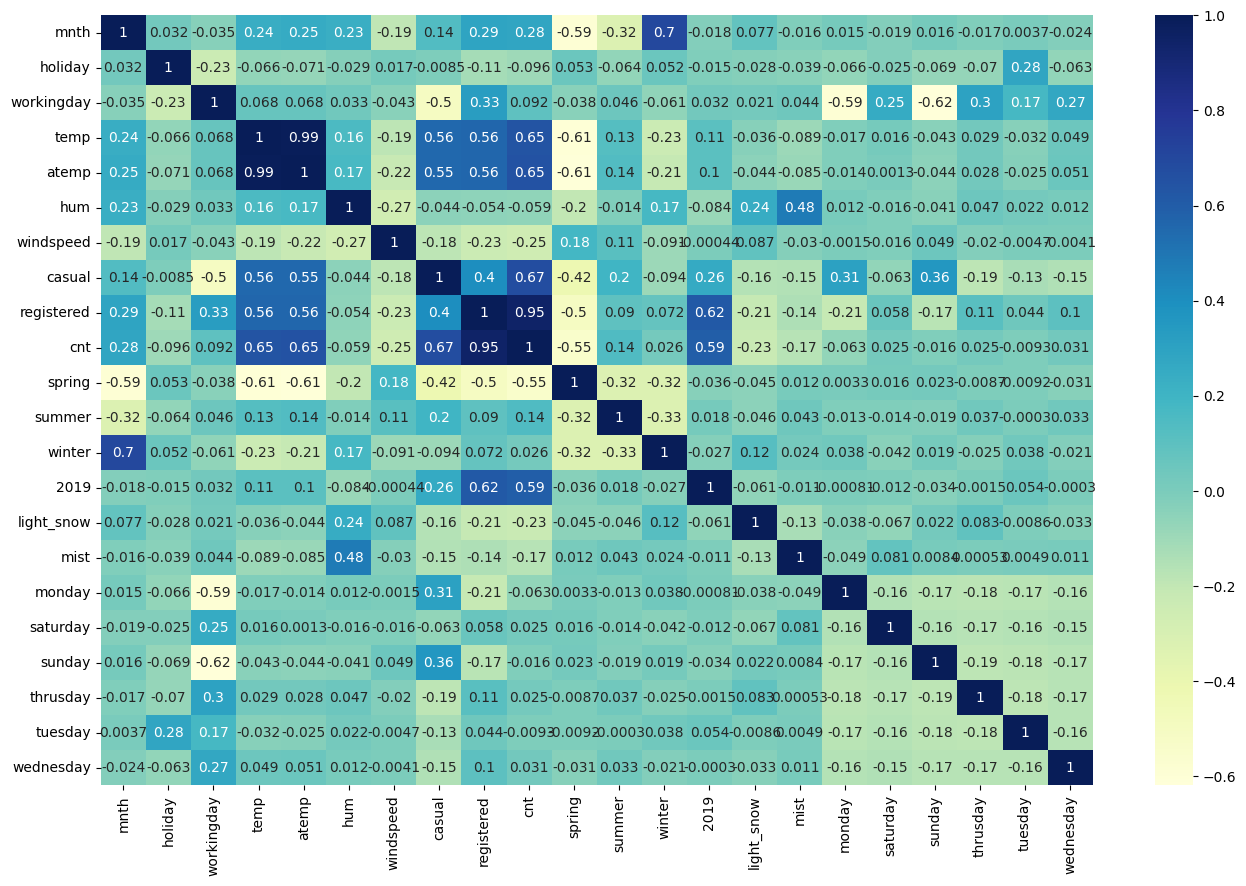

In [94]:
## Modeling
# heatMap
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [95]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

Trying the model with just one value 'register'

In [96]:
# add a contant
X_train_sm = sm.add_constant(X_train['registered'])

# Creat fist model
lr = sm.OLS(y_train, X_train_sm)

# fir the model
lr_model = lr.fit()

# params
lr_model.params

const         0.024369
registered    0.933845
dtype: float64

In [97]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4536.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.26e-255
Time:                        12:00:13   Log-Likelihood:                 624.25
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0244      0.008      3.077      0.002       0.009       0.040
registered     0.9338      0.014     67.350      0.000       0.907       0.961
==============================================================================
Omnibus:                      134.334   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.249
Skew:                           1.510   Prob(JB):                     3.74e-56
Kurtosis:                       4.699   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# Model with all the varibales

In [101]:
X_train.columns

Index(['mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'spring', 'summer', 'winter', '2019',
       'light_snow', 'mist', 'monday', 'saturday', 'sunday', 'thrusday',
       'tuesday', 'wednesday'],
      dtype='object')

In [98]:
X_train_sm = sm.add_constant(X_train)

# Creat 2nd model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.633e+31
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:13:49   Log-Likelihood:                 17551.
No. Observations:                 510   AIC:                        -3.506e+04
Df Residuals:                     489   BIC:                        -3.497e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.582e-16   9.65e-17      3.712      0.000    1.69e-16    5.48e-16
mnth       -1.839e-16   7.81e-17     -2.354      0.019   -3.37e-16   -3.04e-17
holiday    -1.258e-16   7.24e-17     -1.738      0.083   -2.68e-16    1.64e-17
workingday -4.857e-17   4.78e-17     -1.015      0.311   -1.43e-16    4.54e-17
temp        4.788e-16   4.26e-16      1.124      0.262   -3.58e-16    1.32e-15
atemp      -1.454e-15    4.3e-16     -3.379      0.001    -2.3e-15   -6.08e-16
hum          1.44e-16   1.19e-16      1.212      0.226   -8.94e-17    3.77e-16
windspeed  -1.119e-16   8.52e-17     -1.314      0.190   -2.79e-16    5.55e-17
casual         0.3775   1.22e-16   3.09e+15      0.000       0.377       0.377
registered     0.7968   1.45e-16   5.48e+15      0.000       0.797       0.797
spring     -1.379e-16   7.04e-17     -1.959      0.051   -2.76e-16    3.98e-19
summer     -2.515e-16    4.8e-17     -5.240      0.000   -3.46e-16   -1.57e-16
winter     -2.047e-16   5.76e-17     -3.555      0.000   -3.18e-16   -9.16e-17
2019       -3.938e-16   4.31e-17     -9.131      0.000   -4.79e-16   -3.09e-16
light_snow  9.021e-17      9e-17      1.002      0.317   -8.67e-17    2.67e-16
mist       -2.758e-16   3.38e-17     -8.166      0.000   -3.42e-16   -2.09e-16
monday      3.136e-16   4.37e-17      7.177      0.000    2.28e-16    3.99e-16
saturday   -1.252e-16   4.95e-17     -2.531      0.012   -2.22e-16    -2.8e-17
sunday      1.396e-16   4.33e-17      3.222      0.001    5.45e-17    2.25e-16
thrusday   -2.559e-17   4.64e-17     -0.551      0.582   -1.17e-16    6.56e-17
tuesday     2.949e-17   4.77e-17      0.618      0.537   -6.43e-17    1.23e-16
wednesday  -1.509e-16   4.86e-17     -3.109      0.002   -2.46e-16   -5.55e-17
==============================================================================
Omnibus:                        6.374   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.219
Skew:                           0.263   Prob(JB):                       0.0446
Kurtosis:                       3.128   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,workingday,71.05
3,temp,60.02
4,atemp,54.17
17,sunday,15.10
15,monday,13.87
8,registered,7.12
9,spring,5.93
7,casual,4.12
11,winter,4.01
0,mnth,3.93


In [76]:
y_train

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [106]:
dayData['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [6]:
# Create dummy variables for 'Season'
dayData_dummies = pd.get_dummies(dayData['season'], prefix='season', drop_first=True)

# Convert boolean values to numeric (0 and 1)
dayData_dummies = dayData_dummies.astype(int)

# Concatenate dummy variables with the original 'dayData' DataFrame
dayData = pd.concat([dayData, dayData_dummies], axis=1)

# Drop the original 'Season' column
dayData = dayData.drop('season', axis=1)

In [7]:
dayData.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [18]:
# Create dummy variables for 'Season'
dayData_dummies = pd.get_dummies(dayData['mnth'], prefix='mnth', drop_first=True)

# Convert boolean values to numeric (0 and 1)
dayData_dummies = dayData_dummies.astype(int)

# Concatenate dummy variables with the original 'dayData' DataFrame
dayData = pd.concat([dayData, dayData_dummies], axis=1)

# Drop the original 'Season' column
dayData = dayData.drop('mnth', axis=1)

In [20]:
# Create dummy variables for 'Season'
dayData_dummies = pd.get_dummies(dayData['weekday'], prefix='weekday', drop_first=True)

# Convert boolean values to numeric (0 and 1)
dayData_dummies = dayData_dummies.astype(int)

# Concatenate dummy variables with the original 'dayData' DataFrame
dayData = pd.concat([dayData, dayData_dummies], axis=1)

# Drop the original 'Season' column
dayData = dayData.drop('weekday', axis=1)

In [22]:
# Create dummy variables for 'Season'
dayData_dummies = pd.get_dummies(dayData['weathersit'], prefix='weathersit', drop_first=True)

# Convert boolean values to numeric (0 and 1)
dayData_dummies = dayData_dummies.astype(int)

# Concatenate dummy variables with the original 'dayData' DataFrame
dayData = pd.concat([dayData, dayData_dummies], axis=1)

# Drop the original 'Season' column
dayData = dayData.drop('weathersit', axis=1)

In [23]:
dayData.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,1,0,0,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,1,0,0,0,0,0
